In [763]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import pywt

In [735]:
dataset = pd.read_csv("../datasets/binary_regression/ds_backup_5/dataset.csv", index_col=0)

In [736]:
df = dataset #[dataset.label != 1]

In [737]:
X_values = df.loc[:, "e_0":"e_99"].to_numpy()
lables_my = [] #df.label #[]
for l in df.label[:]:
    if l == 1:
        lables_my.append(1)
    elif l == 0 :
        lables_my.append(0)
    elif l == -1 :
        lables_my.append(1)

In [879]:
tmp = df.loc[:, "e_0":"e_199"].to_numpy()
X_values = []
for each in tmp:
    index = -1
    try:
        index = list(each).index(0)
    except:
        pass
    if index != -1:
        avg = sum(each[:index]) / index
        for i in range(index, len(each)):
            each[i] = avg
    wavelet = pywt.dwt(each, 'db1')
    X_values.append(smooth( wavelet[0] ))#smooth(smooth(smooth(smooth(each)))))
lables_my = [] #df.label #[]
for l in df.label[:]:
    if l == 1:
        lables_my.append(1)
    elif l == 0 :
        lables_my.append(0)
    elif l == -1 :
        lables_my.append(1)

In [880]:
try:
    list(tmp[2]).index(0)
except:
    pass

In [881]:
smooth_X = smooth(X_values[1])

1


/Users/nikita/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


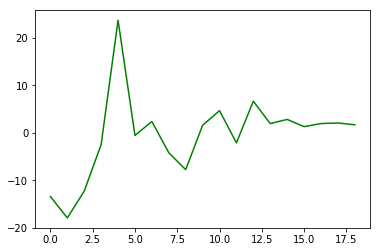

1


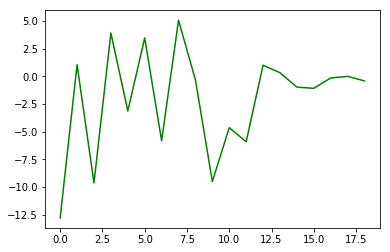

1


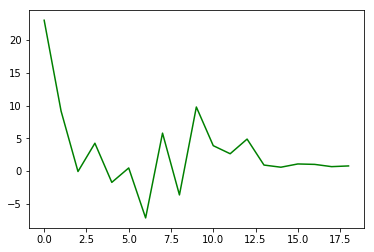

1


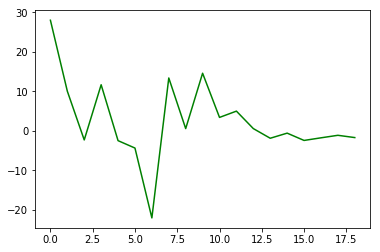

1


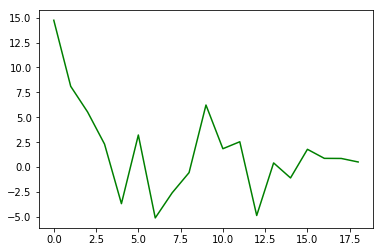

In [882]:
for i in range(5):
    smooth_X = smooth(X_values[i])
    fft = np.fft.fft(smooth_X)
#     int(len(fft)/2)
    print(lables_my[i])
    plt.plot(fft[1:20], 'g')
#     plt.plot(tmp[i], 'y')
#     plt.plot(smooth_X, "b")
#     plt.plot(X_values[i], "r")
    plt.show()

In [883]:
X_train, X_test, y_train, y_test = train_test_split(X_values, lables_my, test_size=0.33, random_state=42)

In [884]:
# y_test

In [885]:
reg = LogisticRegression()

In [886]:
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [887]:
reg.score(X_test, y_test)

0.5737704918032787

In [888]:
ind = 3
reg.predict(X_test)

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0])

In [889]:
# y_test

In [890]:
clf = GradientBoostingClassifier(random_state=0,)

In [891]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [892]:
clf.score(X_test, y_test)

0.6229508196721312

In [893]:
ind = 20
clf.predict(X_test[:ind])

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [894]:
y_test[:ind]

[0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1]

In [869]:
from sklearn.linear_model import Perceptron

In [870]:
perc = Perceptron(tol=1e-3, random_state=0)

In [871]:
perc.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.001, verbose=0, warm_start=False)

In [872]:
perc.score(X_test, y_test)

0.29508196721311475

In [873]:
from sklearn.neural_network import MLPClassifier

In [874]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(64, 32, 16, 8, 2), random_state=1)

In [875]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(64, 32, 16, 8, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [876]:
mlp.score(X_test, y_test)

0.3114754098360656

In [877]:
ind = 20
mlp.predict(X_test[:ind])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [878]:
y_test[:ind]

[0, 1, 0, 1, 0, -1, -1, -1, 0, 1, 0, 0, 0, -1, 1, 0, -1, 1, -1, -1]

# smooth

In [555]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise(ValueError, "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y




from numpy import *
from pylab import *

def smooth_demo():

    t=linspace(-4,4,100)
    x=sin(t)
    xn=x+randn(len(t))*0.1
    y=smooth(x)

    ws=31

    subplot(211)
    plot(ones(ws))

    windows=['flat', 'hanning', 'hamming', 'bartlett', 'blackman']

    hold(True)
    for w in windows[1:]:
        eval('plot('+w+'(ws) )')

    axis([0,30,0,1.1])

    legend(windows)
    title("The smoothing windows")
    subplot(212)
    plot(x)
    plot(xn)
    for w in windows:
        plot(smooth(xn,10,w))
    l=['original signal', 'signal with noise']
    l.extend(windows)

    legend(l)
    title("Smoothing a noisy signal")
    show()


/Users/nikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/nikita/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/nikita/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


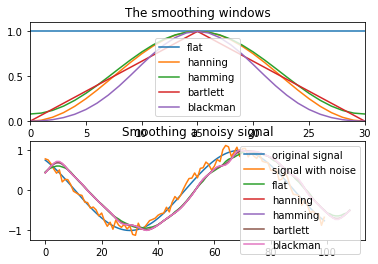

In [556]:
smooth_demo()